In [1]:
# Importar Librerias
import os
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Integer, Categorical, Continuous
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

c:\Users\natha\OneDrive\Bureau\Proyecto_DataPipeline_ML\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Configuración de GitHub
GITHUB_USER = "NathanGhenassia"
GITHUB_REPO = "Data_pipeline_and_ml"
BRANCH = "master"

# URLs de los archivos en GitHub (raw)
raw_url = f"https://raw.githubusercontent.com/{GITHUB_USER}/{GITHUB_REPO}/{BRANCH}/datos/dataset_original.csv"
processed_raw_url = f"https://raw.githubusercontent.com/{GITHUB_USER}/{GITHUB_REPO}/{BRANCH}/datos/dataset_procesado.csv"

# Leer los datasets desde GitHub
df = pd.read_csv(raw_url)
clean_df = pd.read_csv(processed_raw_url)


In [3]:
df

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,gAAAAABnx4aj2SBD6mDJWvVesBJzOknxOJ73lHYsqmmoV2...,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,gAAAAABnx4ajI6wxdLXg4wawwByP6HSUSUZDOm__7OF8ON...,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,gAAAAABnx4aje-QOGMpM60ZbcVwqy2wv0G6A_MXsgVZjmH...,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,gAAAAABnx4ajIFaCD4-RowdUHkKS76YpGuhWdP_vrgE0-K...,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,gAAAAABnx4ajeOLDqFBGpZaYPdhT0KqsW-ZjihjGtWcobO...,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9532,gAAAAABnx4ajVdqsDC4gzIQifv2KHvOpJnnIJreDGU0fYJ...,194,ICMP,3,226.049889,AES,0.517737,3,Chrome,0,1
9533,gAAAAABnx4ajkMXSo-4kd1F9DknjfJyapMg-tKLEQPRMda...,380,TCP,3,182.848475,NaN,0.408485,0,Chrome,0,0
9534,gAAAAABnx4aj5CnEUoKFq-o5k7IfEysgOBfdj8iuZrUWh0...,664,TCP,5,35.170248,AES,0.359200,1,Firefox,0,0
9535,gAAAAABnx4ajEuPjAbIzZJHZb1FndpYNR6YwZKNlo5HWlL...,406,TCP,4,86.664703,AES,0.537417,1,Chrome,1,0


In [4]:
clean_df

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,1,4,492.983263,1,0.606818,1,1,0,1
1,472,1,3,1557.996461,1,0.301569,0,2,0,0
2,629,1,3,75.044262,1,0.739164,2,0,0,1
3,804,2,4,601.248835,1,0.123267,0,4,0,1
4,453,1,5,532.540888,0,0.054874,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
7566,535,1,7,50.518476,1,0.767659,1,1,1,1
7567,746,1,7,315.151758,1,0.190059,3,0,0,1
7568,194,0,3,226.049889,0,0.517737,3,0,0,1
7569,664,1,5,35.170248,0,0.359200,1,2,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB


In [6]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7571 entries, 0 to 7570
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  7571 non-null   int64  
 1   protocol_type        7571 non-null   int64  
 2   login_attempts       7571 non-null   int64  
 3   session_duration     7571 non-null   float64
 4   encryption_used      7571 non-null   int64  
 5   ip_reputation_score  7571 non-null   float64
 6   failed_logins        7571 non-null   int64  
 7   browser_type         7571 non-null   int64  
 8   unusual_time_access  7571 non-null   int64  
 9   attack_detected      7571 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 591.6 KB


In [7]:
# Crear la carpeta "outputs" si no existe
output_dir = "outputs"
os.makedirs(output_dir, exist_ok=True)

Gráfico guardado en outputs\protocol_pie_chart.png


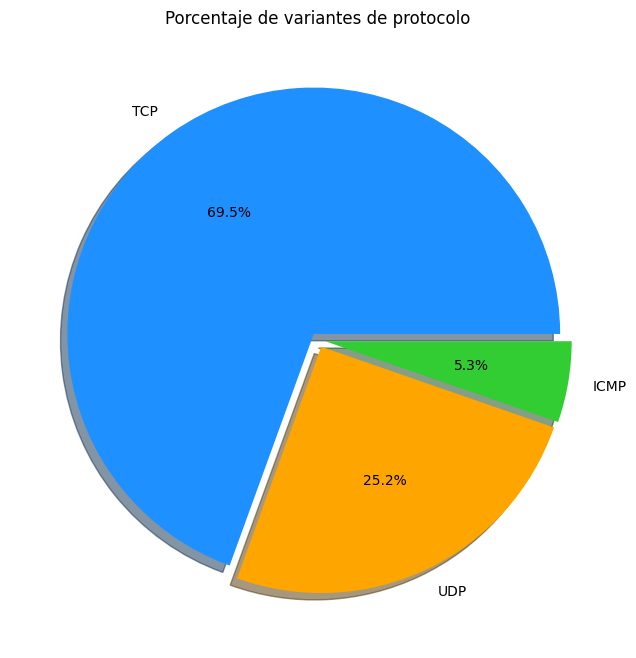

In [8]:
# Pie chart del tipo de Protocolo
plt.figure(figsize = (8,8))
df['protocol_type'].value_counts().plot.pie(explode = [0.03, 0.03, 0.03], colors = ['dodgerblue', 'orange', 'limegreen'], autopct = '%1.1f%%', shadow = True)
plt.xlabel(''),plt.ylabel('')
plt.title('Porcentaje de variantes de protocolo')

# Guardar la imagen en la carpeta outputs
output_path = os.path.join(output_dir, "protocol_pie_chart.png")
plt.savefig(output_path)
print(f"Gráfico guardado en {output_path}")

plt.show()

Gráfico guardado en outputs\variable_heatmap.png


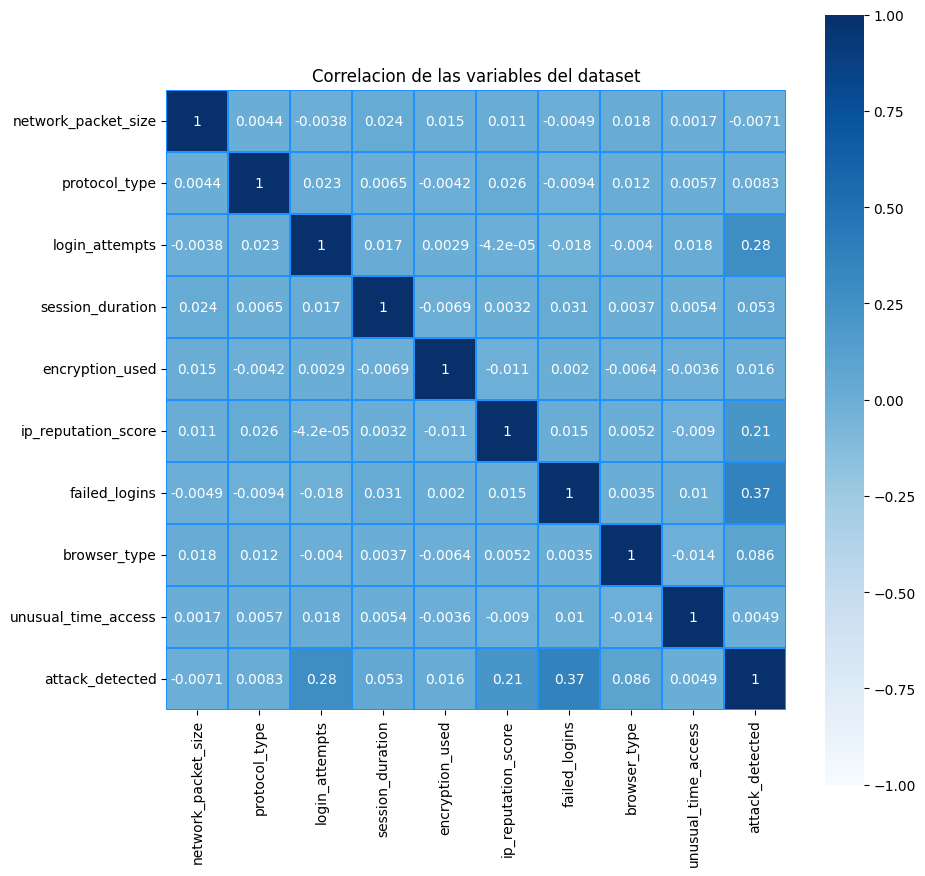

In [9]:
# Heatmap de la correlacion de las variables
plt.figure(figsize = [10,10])
Correlacion = clean_df.corr()
sns.heatmap(Correlacion, cmap = 'Blues', linewidths= 0.3, linecolor= 'dodgerblue', annot=True, vmin=-1, vmax=1, cbar_kws={'orientation':'vertical'}, square=True, cbar= True)
plt.title('Correlacion de las variables del dataset')

# Guardar la imagen en la carpeta outputs
output_path = os.path.join(output_dir, "variable_heatmap.png")
plt.savefig(output_path)
print(f"Gráfico guardado en {output_path}")

plt.show()

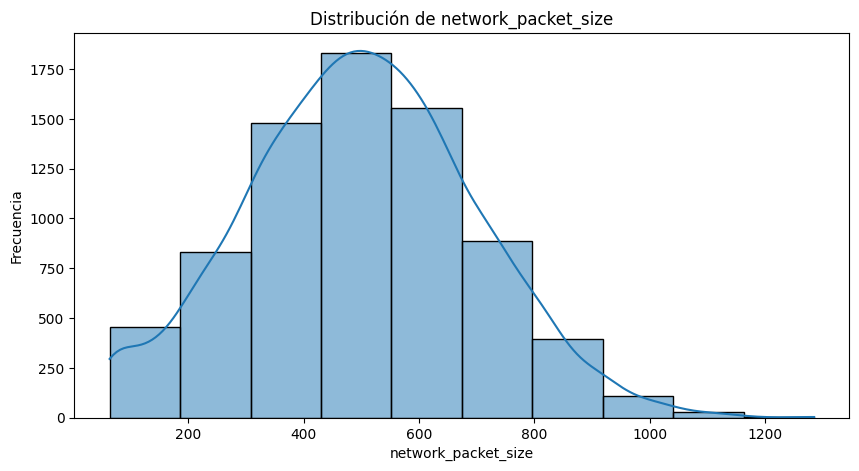

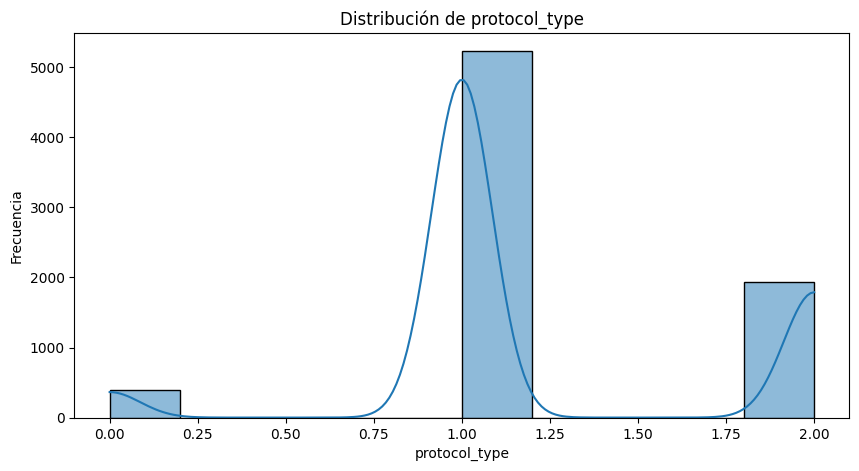

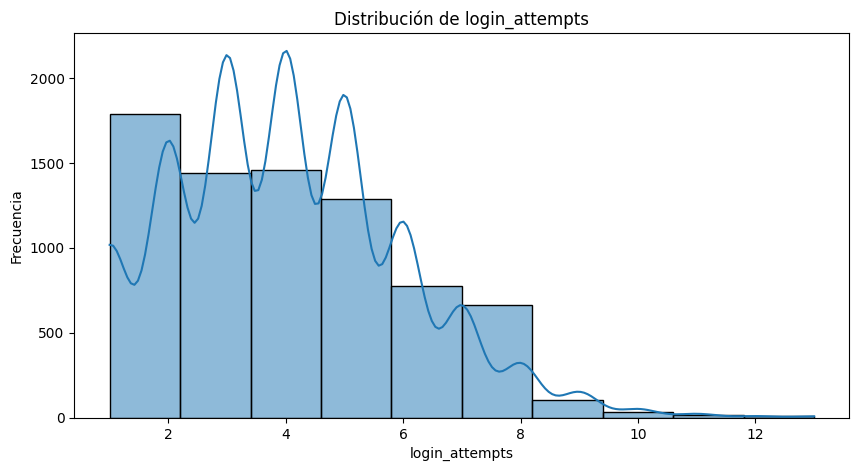

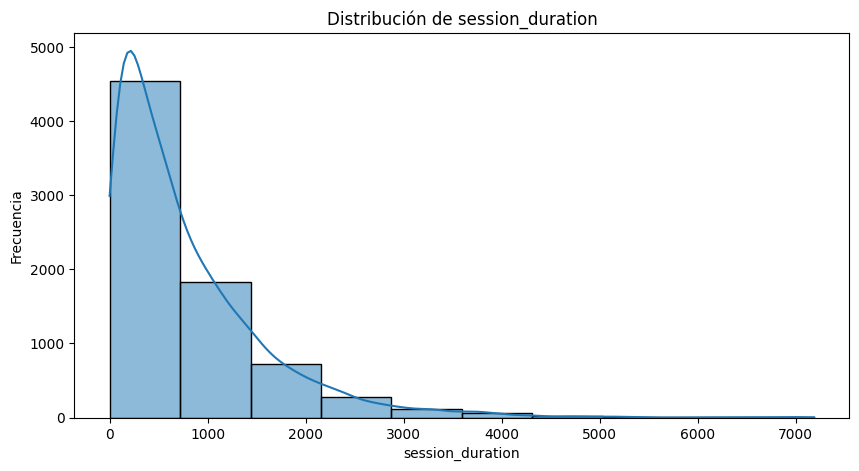

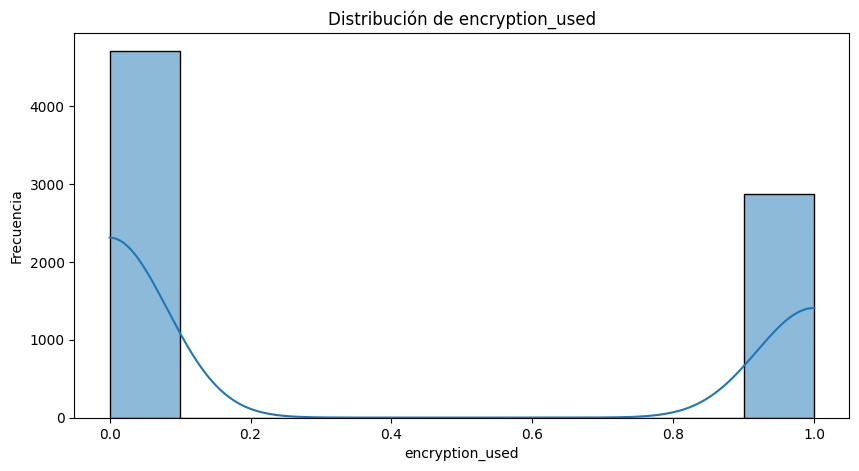

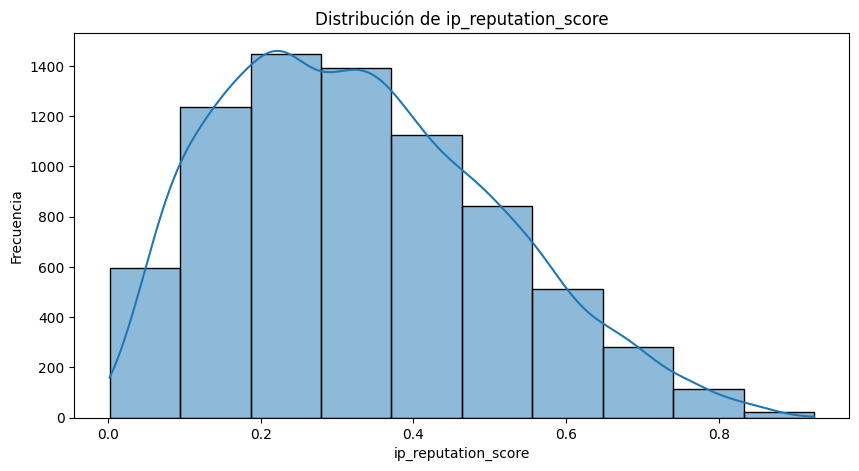

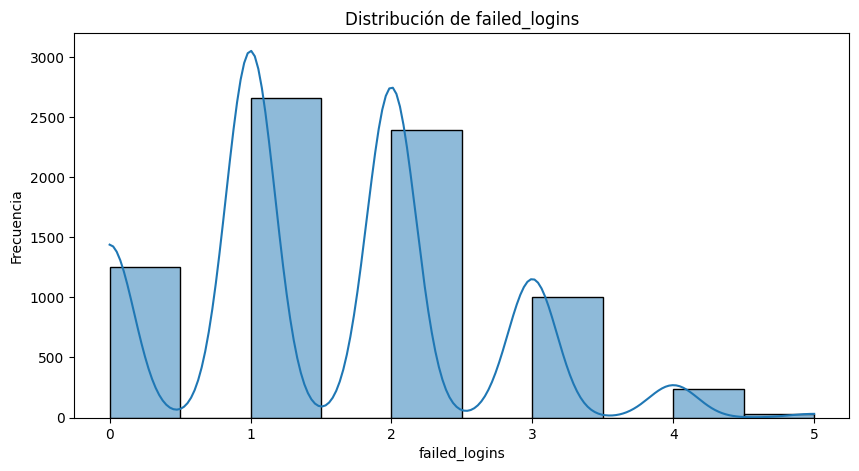

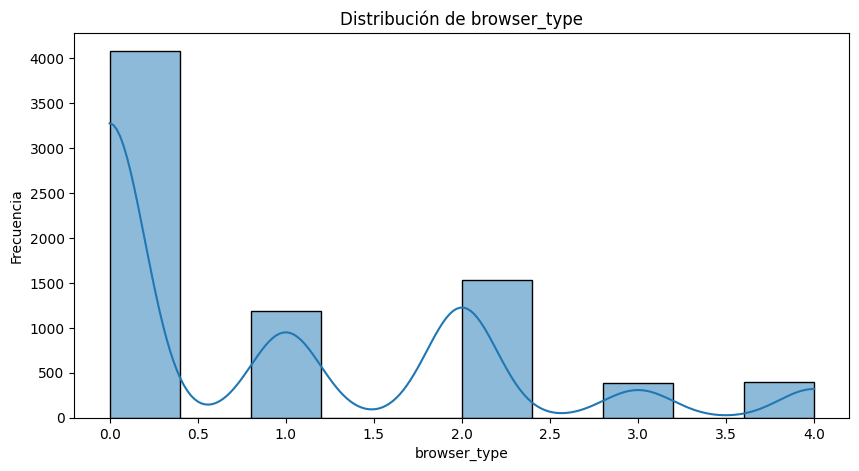

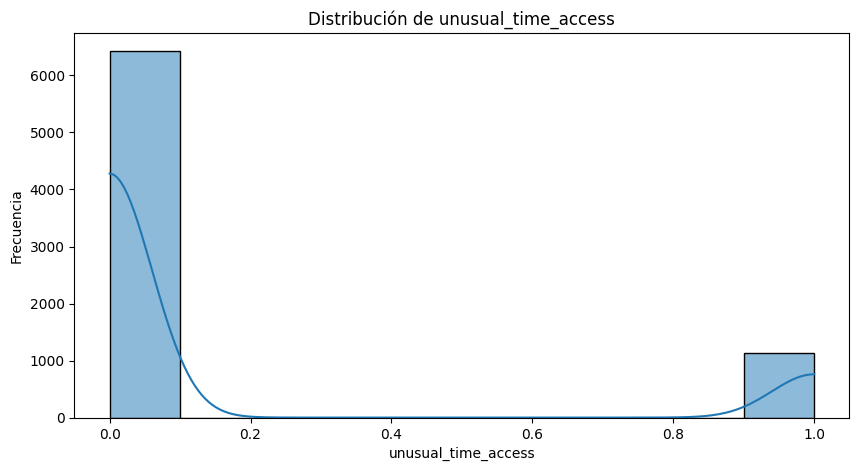

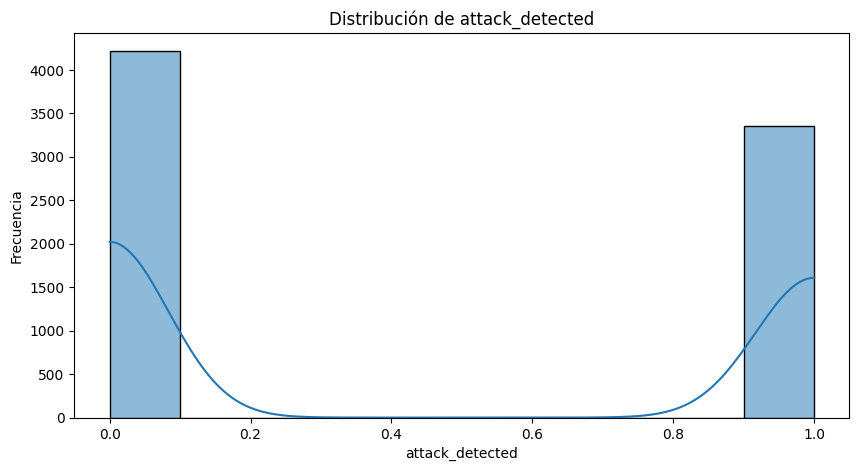

In [10]:
# Gráficos de distribución
for column in clean_df.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(clean_df[column], kde=True, bins=10)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

Gráfico guardado en outputs\predict_variable_distribution.png


C:\Users\natha\AppData\Local\Temp\ipykernel_29892\3506567776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clean_df['attack_detected'], palette='viridis')


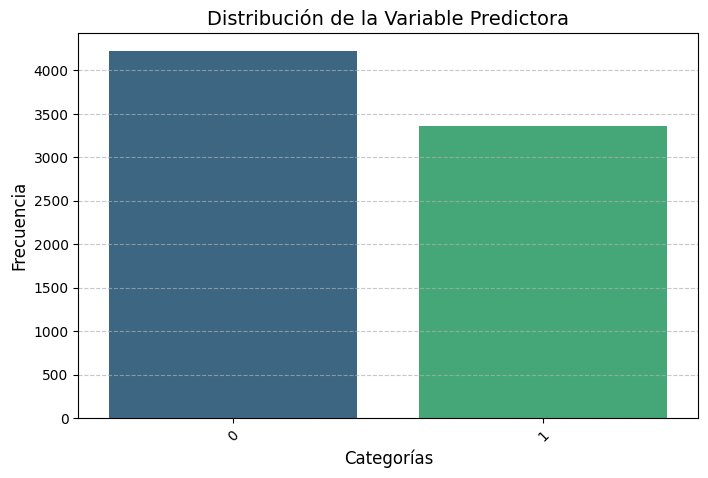

In [11]:
# Histograma distribucion de la clase predictora
plt.figure(figsize=(8, 5))
sns.countplot(x=clean_df['attack_detected'], palette='viridis')
plt.title('Distribución de la Variable Predictora', fontsize=14)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Guardar la imagen en la carpeta outputs
output_path = os.path.join(output_dir, "predict_variable_distribution.png")
plt.savefig(output_path)
print(f"Gráfico guardado en {output_path}")

plt.show()

In [12]:
# Definir los features y target
X = clean_df.drop('attack_detected', axis=1)
Y = clean_df['attack_detected'].values

In [13]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [14]:
# Escalar los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Modelos
models = {
            'SVC': SVC(),
            'DecisionTreeClassifier': DecisionTreeClassifier(),
            'MLPClassifier': MLPClassifier(),
        }

In [16]:
# Parametros
param_grid =  {
            'SVC': {
                'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
                'gamma': Categorical(['auto', 'scale'])
            },

            'DecisionTreeClassifier': {
                'criterion': Categorical(['gini', 'entropy', 'log_loss']),
                'min_samples_split': Integer(2, 10),
                'min_samples_leaf': Integer(1, 10)
            },

            'MLPClassifier': {
                'activation': Categorical(['identity', 'logistic', 'tanh', 'relu']),
                'solver': Categorical(['lbfgs', 'sgd', 'adam']),
                'learning_rate': Categorical(['constant', 'invscaling', 'adaptive']),
                'max_iter': Integer(150, 250)
            },
        }

In [17]:
# DataFrame para almacenar los resultados
benchmark_results = pd.DataFrame(columns=['Model', 'Precision', 'Best Params'])

# Algoritmo Genético para buscar los mejores parámetros
for name, model in models.items():
    print(f"\nEntrenando {name} con GASearchCV:")
    CLF = GASearchCV(
        estimator=model,
        cv=5,
        param_grid=param_grid[name],
        population_size=10,
        generations=40,
        tournament_size=5,
        n_jobs=-1,
        criteria="max",
        scoring="precision"
    )
    
    # Ajustar el modelo
    CLF.fit(X_train, Y_train)
    
    # Predicciones
    y_pred = CLF.predict(X_test)
    
    # Resultados
    precision = precision_score(Y_test, y_pred)
    best_params = CLF.best_params_
    
    # Agregar resultados al DataFrame
    results = pd.DataFrame({'Model': [name], 'Precision': [precision], 'Best Params': [best_params]})
    benchmark_results = pd.concat([benchmark_results, results], ignore_index=True)


Entrenando SVC con GASearchCV:
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.831799	0.0927175  	0.940947   	0.738474   
1  	20    	0.91349 	0.0599099  	0.940947   	0.738474   
2  	20    	0.940947	0          	0.940947   	0.940947   
3  	20    	0.940947	0          	0.940947   	0.940947   
4  	20    	0.940947	0          	0.940947   	0.940947   
5  	20    	0.940947	0          	0.940947   	0.940947   
6  	20    	0.940947	0          	0.940947   	0.940947   
7  	20    	0.940947	0          	0.940947   	0.940947   
8  	20    	0.940947	0          	0.940947   	0.940947   
9  	20    	0.940947	0          	0.940947   	0.940947   
10 	20    	0.940947	0          	0.940947   	0.940947   
11 	20    	0.940947	0          	0.940947   	0.940947   
12 	20    	0.940947	0          	0.940947   	0.940947   
13 	20    	0.940947	0          	0.940947   	0.940947   
14 	20    	0.940947	0          	0.940947   	0.940947   
15 	20    	0.940947	0          	0.940947   	0.940947   
16 	20    	0.940

C:\Users\natha\AppData\Local\Temp\ipykernel_29892\2341875760.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  benchmark_results = pd.concat([benchmark_results, results], ignore_index=True)



Entrenando DecisionTreeClassifier con GASearchCV:
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.853673	0.0379899  	0.926067   	0.798626   
1  	20    	0.908458	0.0223764  	0.926067   	0.866054   
2  	20    	0.92804 	0.00528079 	0.938578   	0.924985   
3  	20    	0.935997	0.00516327 	0.938578   	0.925286   
4  	20    	0.938533	0.000134298	0.938578   	0.93813    
5  	20    	0.939343	0.000714284	0.940633   	0.938578   
6  	20    	0.940094	0.000659701	0.940633   	0.939286   
7  	20    	0.940498	0.000403982	0.940633   	0.939286   
8  	20    	0.940633	0          	0.940633   	0.940633   
9  	20    	0.940633	0          	0.940633   	0.940633   
10 	20    	0.940633	0          	0.940633   	0.940633   
11 	20    	0.940633	0          	0.940633   	0.940633   
12 	20    	0.940633	0          	0.940633   	0.940633   
13 	20    	0.940633	0          	0.940633   	0.940633   
14 	20    	0.940633	0          	0.940633   	0.940633   
15 	20    	0.940633	0          	0.940633   	0.940633 

c:\Users\natha\OneDrive\Bureau\Proyecto_DataPipeline_ML\venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
# Generar un benchmark para comparar metricas
benchmark_results

,Model,Precision,Best Params
0,SVC,0.959538,"{'kernel': 'poly', 'gamma': 'scale'}"
1,DecisionTreeClassifier,0.950998,"{'criterion': 'gini', 'min_samples_split': 4, ..."
2,MLPClassifier,0.984848,"{'activation': 'relu', 'solver': 'lbfgs', 'lea..."


In [19]:
# Mejor modelo
best_model = CLF.best_estimator_

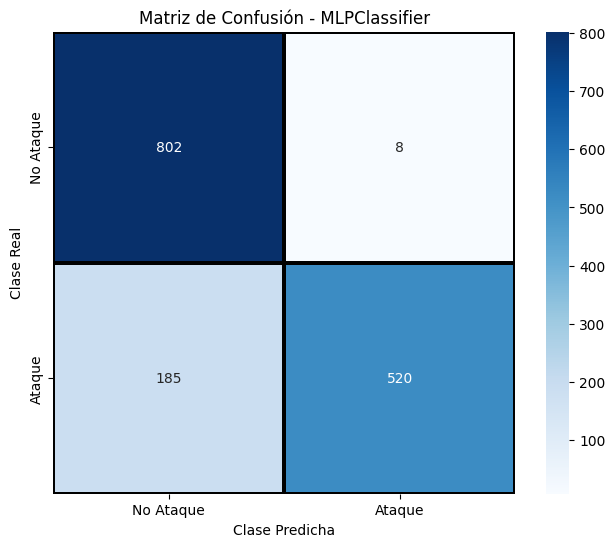


Matriz de Confusión:
[[802   8]
 [185 520]]


In [20]:
# Generar predicciones con el mejor modelo
y_pred_best = best_model.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(Y_test, y_pred_best)

# Graficar la matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            square=True, linewidths=1.5, linecolor='black', 
            cbar=True, xticklabels=['No Ataque', 'Ataque'], yticklabels=['No Ataque', 'Ataque'])

plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title(f'Matriz de Confusión - {best_model.__class__.__name__}')
plt.show()

# Imprimir la matriz de confusión en la terminal
print("\nMatriz de Confusión:")
print(conf_matrix)

In [21]:
# Guardar el mejor modelo y el escalador
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Modelo y scaler exportados correctamente.")

Modelo y scaler exportados correctamente.
